<a href="https://colab.research.google.com/github/skylar1218/ML-Project---Predicting-Disease-Spread/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sources
Data Preparation:
* part 1 - https://www.dataquest.io/blog/pandas-python-tutorial/
* part 2 - https://www.dataquest.io/blog/pandas-tutorial-python-2/

### NDVI
The density of vegetation (NDVI) at a certain point of the image is equal to the difference in the intensities of reflected light in the red and infrared range divided by the sum of these intensities.

This index defines values ​​from -1.0 to 1.0, basically representing greens, where negative values ​​are mainly formed from clouds, water and snow, and values ​​close to zero are primarily formed from rocks and bare soil. Very small values ​​(0.1 or less) of the NDVI function correspond to empty areas of rocks, sand or snow. Moderate values ​​(from 0.2 to 0.3) represent shrubs and meadows, while large values ​​(from 0.6 to 0.8) indicate temperate and tropical forests.

NDVI is a measure of the state of plant health based on how the plant reflects light at certain frequencies (some waves are absorbed and others are reflected).

# Import Data

In [0]:
# import package
import numpy as np
import pandas as pd

In [0]:
# import csv files
url = "https://raw.githubusercontent.com/skylar1218/ML-Project---Predicting-Disease-Spread/master/data/dengue_features_train.csv"
dengue_features_train = pd.read_csv(url)

In [0]:
url = "https://raw.githubusercontent.com/skylar1218/ML-Project---Predicting-Disease-Spread/master/data/dengue_labels_train.csv"
dengue_labels_train = pd.read_csv(url)

In [0]:
url = 'https://raw.githubusercontent.com/skylar1218/ML-Project---Predicting-Disease-Spread/master/data/dengue_features_test.csv'
dengue_features_test = pd.read_csv(url)

# Data Description

In [0]:
dengue_features_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [0]:
dengue_features_train.shape

(1456, 24)

In [0]:
dengue_labels_train.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [0]:
dengue_labels_train.shape

(1456, 4)

In [0]:
dengue_features_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [0]:
dengue_features_test.shape

(416, 24)

In [0]:
dengue_features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [0]:
dengue_features_train.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


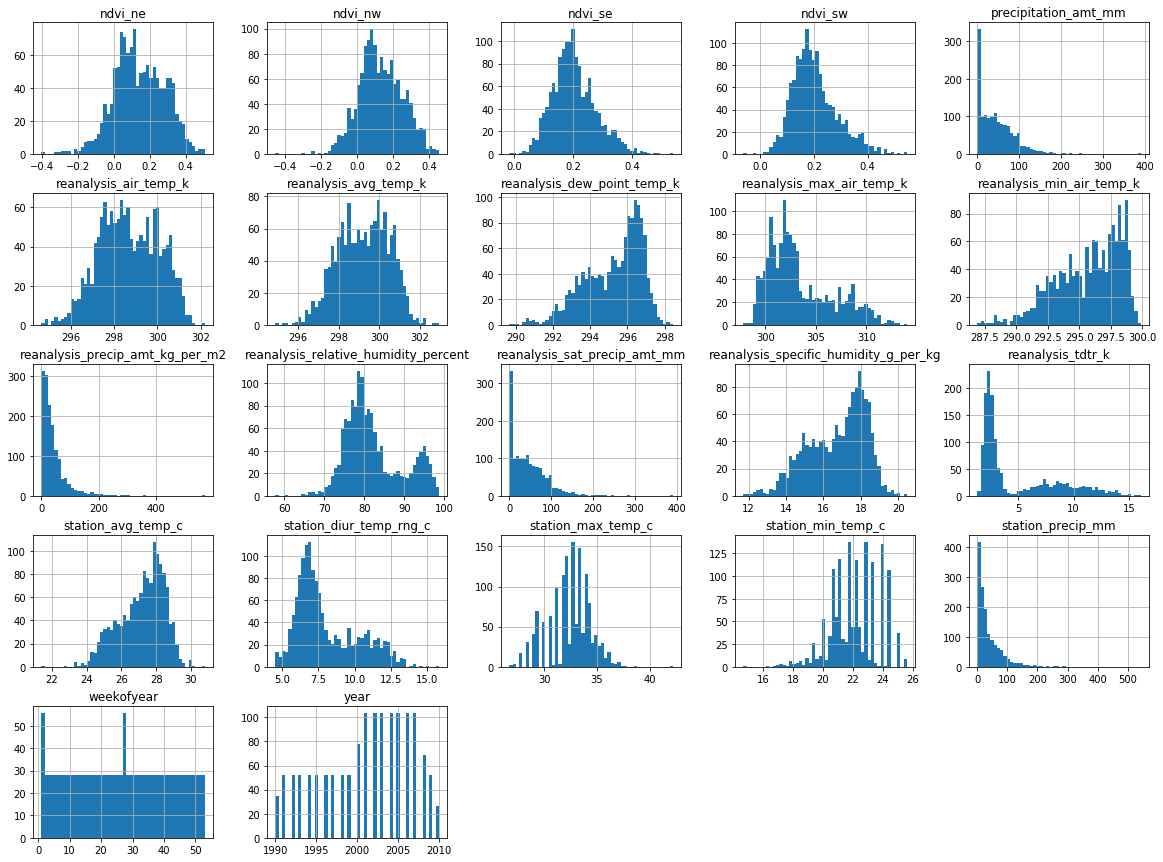

In [0]:
# plot histogram for all features
%matplotlib inline
import matplotlib.pyplot as plt
dengue_features_train.hist(bins=50, figsize=(20,15))

plt.show()

In [0]:
# check missing for each column
# training data
dengue_features_train.isnull().sum(axis=0)

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [0]:
# test data
dengue_features_test.isnull().sum(axis=0)

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [0]:
pd.set_option('display.max_rows', None)
dengue_features_train[(dengue_features_train['city'] == 'sj') & (dengue_features_train['weekofyear'] == 23)]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,302.4,298.1,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
57,sj,1991,23,1991-06-04,0.08585,0.087000,0.119600,0.165929,8.08,299.518571,299.750000,294.925714,301.6,297.4,5.00,76.074286,8.08,16.324286,2.871429,28.071429,7.500000,33.3,23.3,20.6
109,sj,1992,23,1992-06-03,0.12165,0.139950,0.110086,0.102229,42.24,299.104286,299.228571,296.522857,301.0,297.8,50.00,85.827143,42.24,17.995714,2.114286,27.500000,6.914286,31.7,22.8,103.9
162,sj,1993,23,1993-06-11,0.12060,NaN,0.153771,0.148486,8.48,300.658571,300.735714,296.978571,302.8,298.5,20.20,80.615714,8.48,18.491429,2.642857,29.900000,7.385714,34.4,25.0,1.3
214,sj,1994,23,1994-06-11,0.08005,0.069050,0.061614,0.058543,42.53,299.327143,299.535714,295.642857,301.3,298.0,21.50,80.382857,42.53,17.015714,2.471429,28.228571,7.628571,32.8,23.3,67.3
266,sj,1995,23,1995-06-11,0.15495,0.027800,0.266614,0.211900,106.04,298.688571,298.650000,295.827143,300.2,297.5,86.80,84.345714,106.04,17.217143,1.642857,27.300000,7.142857,31.1,22.8,35.5
317,sj,1996,23,1996-06-03,0.05290,0.080075,0.179314,0.157900,137.06,299.254286,299.192857,296.005714,301.4,297.9,24.38,82.368571,137.06,17.394286,2.071429,27.814286,7.028571,32.2,23.9,2.3
369,sj,1997,23,1997-06-04,0.05570,0.088950,0.184157,0.162357,118.35,298.995714,299.042857,295.978571,300.6,297.9,41.70,83.485714,118.35,17.368571,1.971429,27.271429,7.071429,32.8,22.2,31.3
421,sj,1998,23,1998-06-04,-0.04270,0.070767,0.153600,0.122143,8.19,299.618571,299.807143,296.351429,301.4,298.1,35.80,82.460000,8.19,17.765714,2.328571,27.857143,6.200000,32.2,23.9,10.5
474,sj,1999,23,1999-06-11,0.04990,0.049900,0.072233,0.080133,100.35,300.025714,299.978571,296.430000,302.0,298.3,24.80,80.754286,100.35,17.854286,2.500000,27.914286,7.557143,33.9,22.8,56.8


# Delete Training Data Observations with Majority Features Missing

https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/

In [0]:
# option 1 - keep only the rows with at least 5 non-na values
# X_train1 = dengue_features_train.dropna(thresh=5)

In [0]:
# option 2 - get names of indexes for which observations with more than 15 variables' values missing
indexNames = dengue_features_train[dengue_features_train.isnull().sum(axis=1)>15].index

In [0]:
indexNames

Int64Index([87, 139, 399, 451, 711, 763, 1118, 1170, 1378, 1430], dtype='int64')

In [0]:
dengue_features_train[dengue_features_train.isnull().sum(axis=1)>15]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
87,sj,1992,1,1992-01-01,0.125100,0.157867,0.185283,0.181367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,sj,1993,53,1993-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,sj,1998,1,1998-01-01,0.045500,0.047800,0.123986,0.083443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451,sj,1999,53,1999-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
711,sj,2004,1,2004-01-01,-0.268300,-0.123700,0.223757,0.176543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763,sj,2005,53,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1118,iq,2004,1,2004-01-01,0.202571,0.198967,0.244557,0.187957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1170,iq,2005,53,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1378,iq,2009,1,2009-01-01,0.151286,0.161686,0.153271,0.119443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1430,iq,2010,53,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




*   Half of the missing observations are from week 53 of the year; those observations have all features' values missing.



In [0]:
# check how many observations are from week 53 in training data
dengue_features_train[dengue_features_train.weekofyear > 52]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
139,sj,1993,53,1993-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451,sj,1999,53,1999-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763,sj,2005,53,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1170,iq,2005,53,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1430,iq,2010,53,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# check how many observations are from week 53 in testing data
dengue_features_test[dengue_features_test.weekofyear > 52]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
87,sj,2010,53,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




*   There is only 1 test data with week of the year = 53
*   We can drop the week 53 observations in the training data and then predict the week 53 observations either using the model or set it equal to the average of the week 52 prediction



In [0]:
# delete these row indexes from dengue_features_train
X_train1 = dengue_features_train.drop(indexNames)
y_train1 = dengue_labels_train.drop(indexNames)

In [0]:
print(X_train1.shape)
print(y_train1.shape)

(1446, 24)
(1446, 4)


In [0]:
# check missing for each column
X_train1.isnull().sum(axis=0)

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  189
ndvi_nw                                   47
ndvi_se                                   17
ndvi_sw                                   17
precipitation_amt_mm                       3
reanalysis_air_temp_k                      0
reanalysis_avg_temp_k                      0
reanalysis_dew_point_temp_k                0
reanalysis_max_air_temp_k                  0
reanalysis_min_air_temp_k                  0
reanalysis_precip_amt_kg_per_m2            0
reanalysis_relative_humidity_percent       0
reanalysis_sat_precip_amt_mm               3
reanalysis_specific_humidity_g_per_kg      0
reanalysis_tdtr_k                          0
station_avg_temp_c                        33
station_diur_temp_rng_c                   33
station_max_temp_c                        10
station_mi

# Create a Dummy Variable for City

In [0]:
X_train1['city_sj'] = [1 if x == 'sj' else 0 for x in X_train1['city']]

In [0]:
X_train1.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_sj
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,1
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,1
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,1
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,1
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,1


In [0]:
X_test1 = dengue_features_test.copy()
X_test1['city_sj'] = [1 if x == 'sj' else 0 for x in X_test1['city']]

In [0]:
X_test1.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_sj
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,1
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,1
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,1
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,1
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,1


# Replace Feature Missing Value

https://medium.com/@george.drakos62/handling-missing-values-in-machine-learning-part-1-dda69d4f88ca

https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

*   Replace with overall Median
```
dataframe.Column_Name.fillna(dataframe.Column_Name.median(),inplace=True)
```
*   Replace with values close to the mean value but within one standard deviation
```
Column_Name_avg = dataframe['Column_Name'].mean()
Column_Name_std = dataframe['Column_Name'].std()
Column_Name_null_count = dataframe['Column_Name'].isnull().sum()
Column_Name_null_random_list = np.random.randint(Column_Name_avg - Column_Name_std, Column_Name_avg + Column_Name_std, size=Column_Name_null_count)
dataframe['Column_Name'][np.isnan(dataframe['Column_Name'])] = Column_Name_null_random_list
dataframe['Column_Name'] = dataframe['Column_Name'].astype(int)
```
*   Back-fill or forward-fill to propagate next or previous values respectively
```
# for back fill
dataframe.fillna(method='bfill',inplace=True)
# for forward-fill
dataframe.fillna(method='ffill',inplace=True)
```
*   Replace with some constant value outside fixed value range: -999,-1 etc
```
dataframe.Column_Name.fillna(-99,inplace=True)
```
*   Replace with median by cluster (imputation using k-NN)
 * Computationally expensive. KNN works by storing the whole training dataset in memory.
 * K-NN is quite sensitive to outliers in the data (unlike SVM).
```
import sys
from impyute.imputation.cs import fast_knn
# Increase the recursion limit of the OS
sys.setrecursionlimit(100000)
# start the KNN training
imputed_training=fast_knn(train.values, k=30)
```
* Imputation Using Multivariate Imputation by Chained Equation (MICE)
 * filling the missing data multiple times
 * Multiple Imputations (MIs) are much better than a single imputation as it measures the uncertainty of the missing values in a better way
  * can handle different variables of different data types (ie., continuous or binary) as well as complexities such as bounds or survey skip patterns
```
from impyute.imputation.cs import mice
# start the MICE training
imputed_training=mice(train.values)
```
* Stochastic regression imputation
 * predict the missing values by regressing it from other related variables in the same dataset plus some random residual value

* Multivariate feature imputation
 * https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer
* Nearest neighbors imputation
 * https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer





In [0]:
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=5)

# label = X_train1.iloc[:, 0:4]
# data = X_train1.iloc[:, 4:]

# data_missing_filled = imputer.fit_transform(data)
# data_missing_filled

## Find the optimal n_cluster for EM-type Algorithm (k-POD)

In [0]:
# find the optimal n_cluster for training data
X_tr = X_train1.copy()

In [0]:
# features that have no missing values
X_tr = X_tr[['city_sj', 'weekofyear', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 
             'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2', 
             'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k']]

In [0]:
# find the optimal n_cluster using k-Means on features with no missing values
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def getInertia(X,kmeans):
    ''' This function returns the exact same value as the attribute inertia_ of kmeans'''
    inertia = 0
    for J in range(len(X)):
        inertia = inertia + np.linalg.norm(X[J] - kmeans.cluster_centers_[kmeans.labels_[J]])**2
    return inertia

In [0]:
inertias_1 = []
silhouette_avgs = []
max_K = 15
for k in np.arange(1,max_K+1):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_tr)    
    inertias_1 = inertias_1 + [kmeans.inertia_]
    if k>1:
        silhouette_avgs = silhouette_avgs + [silhouette_score(X_tr, kmeans.labels_)]

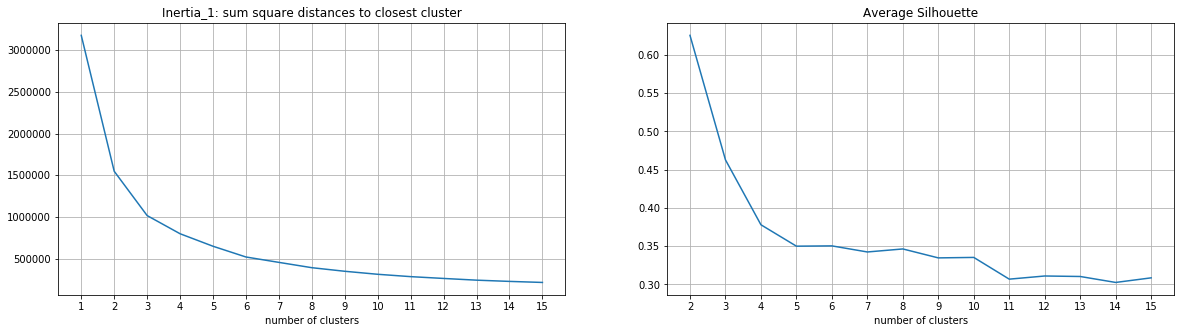

In [0]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title("Inertia_1: sum square distances to closest cluster")
plt.plot(np.arange(1,max_K+1),inertias_1)
plt.xticks(np.arange(1,max_K+1))
plt.xlabel('number of clusters')
plt.grid()

plt.subplot(1,2,2)  
plt.title("Average Silhouette")
plt.plot(np.arange(2,max_K+1), silhouette_avgs)
plt.xticks(np.arange(2,max_K+1))
plt.xlabel('number of clusters')
plt.grid()

plt.show()

There is to evident elbow for k=2. This value also maximize the silhouette plot. So k=2 is acceptable number of clusters.

In [0]:
# find the optimal n_cluster for test data
df = X_test1.copy()

In [0]:
indexNames = X_test1[X_test1.isnull().sum(axis=1)>15].index

In [0]:
df = df.drop(indexNames)

In [0]:
print(df.shape)

(414, 25)


In [0]:
df.isnull().sum(axis=0)

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  42
ndvi_nw                                  10
ndvi_se                                   0
ndvi_sw                                   0
precipitation_amt_mm                      0
reanalysis_air_temp_k                     0
reanalysis_avg_temp_k                     0
reanalysis_dew_point_temp_k               0
reanalysis_max_air_temp_k                 0
reanalysis_min_air_temp_k                 0
reanalysis_precip_amt_kg_per_m2           0
reanalysis_relative_humidity_percent      0
reanalysis_sat_precip_amt_mm              0
reanalysis_specific_humidity_g_per_kg     0
reanalysis_tdtr_k                         0
station_avg_temp_c                       10
station_diur_temp_rng_c                  10
station_max_temp_c                        1
station_min_temp_c              

In [0]:
df = df[['city_sj', 'weekofyear', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
         'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
         'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
         'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k']]

In [0]:
# find the optimal n_cluster using k-Means on features with no missing values
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def getInertia(X,kmeans):
    ''' This function returns the exact same value as the attribute inertia_ of kmeans'''
    inertia = 0
    for J in range(len(X)):
        inertia = inertia + np.linalg.norm(X[J] - kmeans.cluster_centers_[kmeans.labels_[J]])**2
    return inertia

In [0]:
inertias_1 = []
silhouette_avgs = []
max_K = 15
for k in np.arange(1,max_K+1):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df)    
    inertias_1 = inertias_1 + [kmeans.inertia_]
    if k>1:
        silhouette_avgs = silhouette_avgs + [silhouette_score(df, kmeans.labels_)]

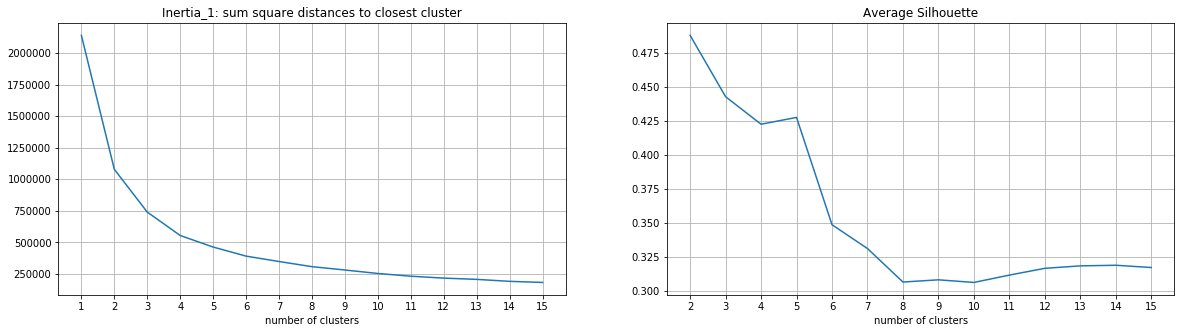

In [0]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title("Inertia_1: sum square distances to closest cluster")
plt.plot(np.arange(1,max_K+1),inertias_1)
plt.xticks(np.arange(1,max_K+1))
plt.xlabel('number of clusters')
plt.grid()

plt.subplot(1,2,2)  
plt.title("Average Silhouette")
plt.plot(np.arange(2,max_K+1), silhouette_avgs)
plt.xticks(np.arange(2,max_K+1))
plt.xlabel('number of clusters')
plt.grid()

plt.show()

There is to evident elbow for k=2. This value also maximize the silhouette plot. So k=2 is acceptable number of clusters.

## Iterative EM-type algorithm:

*   Initialize missing values to their column means
*   Repeat until convergence
*   Perform K-means clustering on the filled-in data
*   Set the missing values to the centroid coordinates of the clusters to which they were assigned

https://stackoverflow.com/questions/35611465/python-scikit-learn-clustering-with-missing-data

https://arxiv.org/pdf/1411.7013.pdf


In [0]:
X_tr = X_train1.copy()
X_te = X_test1.copy()

In [0]:
X_tr.drop(columns=['city', 'year', 'week_start_date'], inplace=True)
X_te.drop(columns=['city', 'year', 'week_start_date'], inplace=True)

In [0]:
from sklearn.cluster import KMeans

def kmeans_missing(X, n_clusters, max_iter=10):
    """Perform K-Means clustering on data with missing values.

    Args:
      X: An [n_samples, n_features] array of data to cluster.
      n_clusters: Number of clusters to form.
      max_iter: Maximum number of EM iterations to perform.

    Returns:
      labels: An [n_samples] vector of integer labels.
      centroids: An [n_clusters, n_features] array of cluster centroids.
      X_hat: Copy of X with the missing values filled in.
    """

    # Initialize missing values to their column means
    missing = ~np.isfinite(X)
    mu = np.nanmean(X, 0, keepdims=1)
    X_hat = np.where(missing, mu, X)

    for i in range(max_iter):
        if i > 0:
            # initialize KMeans with the previous set of centroids. this is much
            # faster and makes it easier to check convergence (since labels
            # won't be permuted on every iteration), but might be more prone to
            # getting stuck in local minima.
            cls = KMeans(n_clusters, init=prev_centroids)
        else:
            # do multiple random initializations in parallel
            cls = KMeans(n_clusters, n_jobs=-1)

        # perform clustering on the filled-in data
        labels = cls.fit_predict(X_hat)
        centroids = cls.cluster_centers_

        # fill in the missing values based on their cluster centroids
        X_hat[missing] = centroids[labels][missing]

        # when the labels have stopped changing then we have converged
        if i > 0 and np.all(labels == prev_labels):
            break

        prev_labels = labels
        prev_centroids = cls.cluster_centers_

    return labels, centroids, X_hat

In [0]:
# filling the missing
# X_tr_hat is the output data
labels_tr, centroids_tr, X_tr_hat = kmeans_missing(X_tr, n_clusters=2) # n_cluster is defined in the previous step
labels_te, centroids_te, X_te_hat = kmeans_missing(X_te, n_clusters=2)

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


In [0]:
X_train2 = pd.DataFrame(X_tr_hat, index=X_tr.index, columns=X_tr.columns)
y_train2 = y_train1.copy()

In [0]:
X_test2 = pd.DataFrame(X_te_hat, index=X_te.index, columns=X_te.columns)

# Split Data into Train and Validation

In [0]:
df = X_train2.copy()

In [0]:
# merge the label with features before splitting the data
df['total_cases'] = y_train2.total_cases

In [0]:
from sklearn.model_selection import train_test_split

train_set, val_set = train_test_split(df, test_size = 0.3, random_state = 42)

In [0]:
train_set_feature = train_set.drop(['total_cases'], axis=1)
train_set_label = train_set.total_cases

In [0]:
val_set_feature = val_set.drop(['total_cases'], axis=1)
val_set_label = val_set.total_cases

In [0]:
print(train_set_feature.shape)
print(val_set_feature.shape)

(1012, 22)
(434, 22)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2fbc040208>,
      dtype=object)

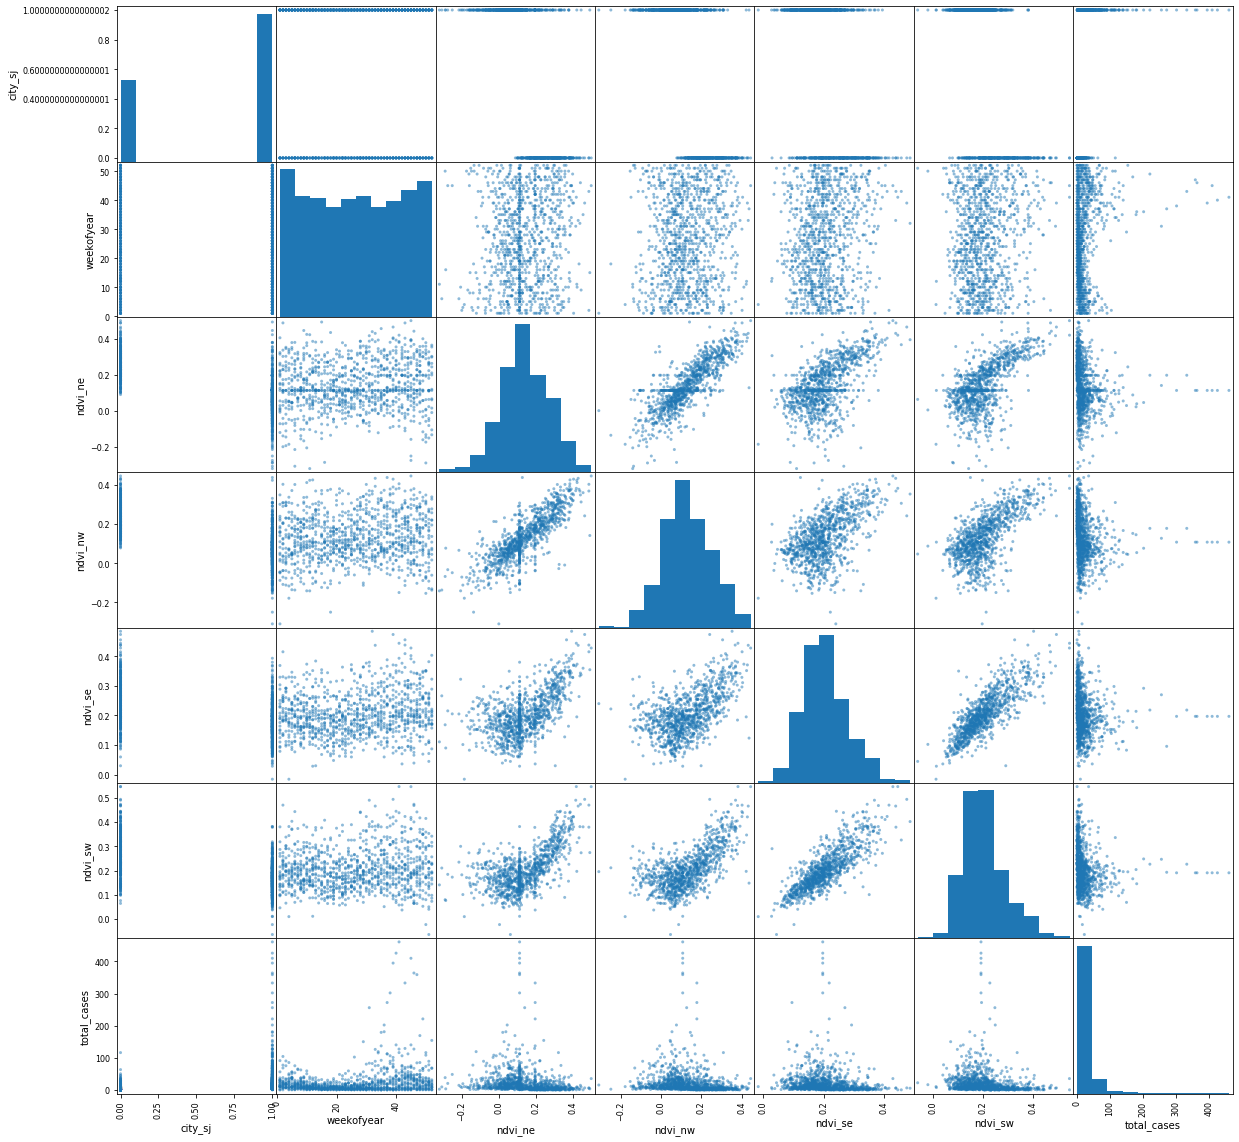

In [0]:
# looking for correlations
from pandas.plotting import scatter_matrix
attributes = ["city_sj","weekofyear","ndvi_ne", "ndvi_nw", "ndvi_se","ndvi_sw","total_cases"]
scatter_matrix(train_set[attributes], figsize=(20, 20))

# Feature Scaling

In [0]:
df_tr = train_set_feature.copy()
df_val = val_set_feature.copy()
df_te = X_test2.copy()

In [0]:
col_names = ['weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k', 
             'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 
             'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 
             'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 
             'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm']

In [0]:
# select the continuous numeric features in training data
features_tr = df_tr[col_names]

# select the continuous numeric features in val data
features_val = df_val[col_names]

# select the continuous numeric features in test data
features_te = df_te[col_names]

In [0]:
# sclae on only continuous numeric features
from sklearn.preprocessing import StandardScaler

# fit the standard scaler on training data features value
scaler = StandardScaler().fit(features_tr.values)

# scale training, val, test features value based on training features value
features_tr = scaler.transform(features_tr.values)
features_val = scaler.transform(features_val.values)
features_te = scaler.transform(features_te.values)

In [0]:
# transform it back to dataframe with proper index and column names
tr_feature_scaled = pd.DataFrame(features_tr, columns=col_names, index=train_set_feature.index)
val_feature_scaled = pd.DataFrame(features_val, columns=col_names, index=val_set_feature.index)
te_feature_scaled = pd.DataFrame(features_te, columns=col_names, index=X_test2.index)

In [0]:
tr_dummy = train_set_feature[['city_sj']]

val_dummy = val_set_feature[['city_sj']]

te_dummy = X_test2[['city_sj']]                                                         

In [0]:
# merge back the dummry features
tr_feature_scaled = pd.concat([tr_feature_scaled, tr_dummy], axis=1)
val_feature_scaled = pd.concat([val_feature_scaled, val_dummy], axis=1)
te_feature_scaled = pd.concat([te_feature_scaled, te_dummy], axis=1)

In [0]:
tr_feature_scaled.head()

,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_sj
996,0.576417,0.655548,0.581395,0.391783,0.717300,0.054982,0.049785,1.035465,-0.973869,2.410619,-1.047843,-0.527180,-0.726992,0.054982,-0.950555,2.211561,0.033331,2.095088,1.422387,-1.315136,-0.183824,0.0
1204,0.510122,1.411681,1.183386,0.919152,1.139398,0.579290,-0.187881,0.372580,-0.178293,1.729052,-1.086763,-0.552152,0.246384,0.579290,-0.180725,1.654511,0.465374,2.396399,1.319313,-1.123583,1.789087,0.0
1064,1.637146,0.851901,0.446217,0.897795,0.062626,-0.464807,-0.636922,-0.120334,0.918186,0.799642,-0.347281,-0.356074,1.656155,-0.464807,0.999003,0.544418,0.646046,0.312600,0.803944,0.791946,-0.327683,0.0
1207,0.709008,0.740802,0.706599,0.471244,0.281243,-0.632995,0.144430,0.474562,0.286569,1.202386,-1.086763,-0.101729,0.228847,-0.632995,0.326326,1.406043,-0.095281,-0.183207,-0.188411,0.038899,-0.794194,0.0
97,-1.014675,-0.404551,-0.342440,-1.024283,-0.572204,-0.524517,-0.772581,-1.128825,-1.094975,-1.183100,0.158680,-0.626605,-0.571582,-0.524517,-1.149490,-0.673879,-1.077637,-0.145483,-0.381407,-0.229670,-0.699659,1.0


In [0]:
print(tr_feature_scaled.shape)
print(val_feature_scaled.shape)
print(te_feature_scaled.shape)

(1012, 22)
(434, 22)
(416, 22)


In [0]:
tr_label = train_set_label.copy()
val_label = val_set_label.copy()

Final datasets are:
*   tr_feature_scaled
*   tr_label
*   val_feature_scaled
*   val_label
*   te_feature




# Decision Tree

## Fit a Decision Tree with Default Parameters

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())

In [0]:
dt_reg = DecisionTreeRegressor(random_state=42)

# fit the decision tree regressor onto training data
dt_reg.fit(tr_feature_scaled, tr_label)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

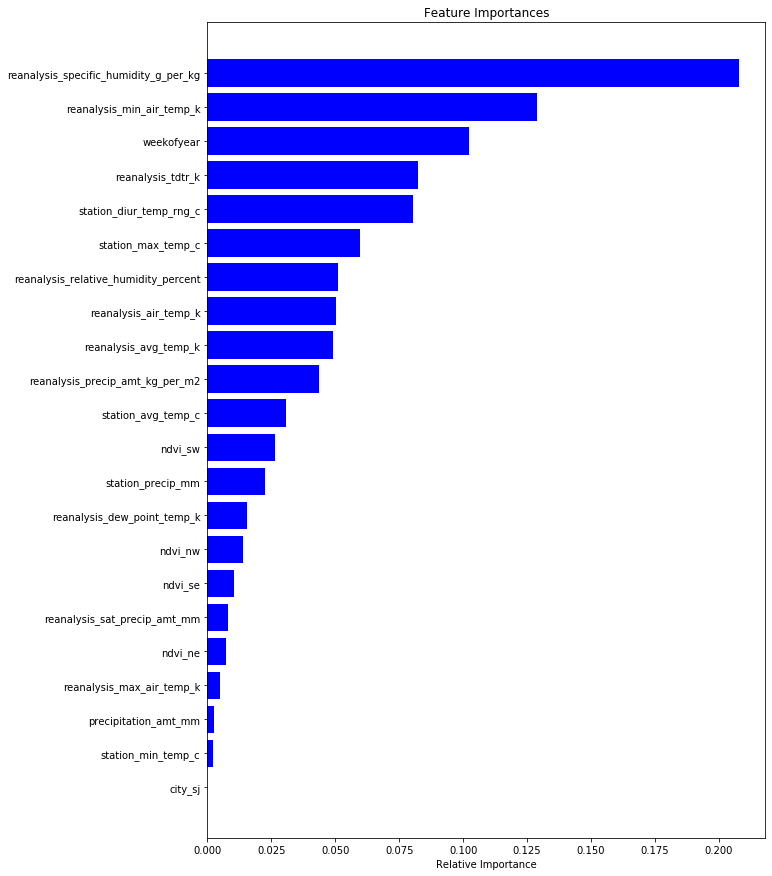

In [0]:
# plot feature importance
import matplotlib
import matplotlib.pyplot as plt

features = tr_feature_scaled.columns
importances = dt_reg.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:
# predict on val data
val_pred = dt_reg.predict(val_feature_scaled)

In [0]:
# mean absolue error of the val data
mean_absolute_error(val_label, val_pred)

25.205069124423964

In [0]:
# cross-validation
dt_cv_score = cross_val_score(dt_reg, tr_feature_scaled, tr_label, cv=20, scoring='neg_mean_absolute_error')

In [0]:
dt_mae_scores = -dt_cv_score
display_scores(dt_mae_scores)

Scores: [20.52941176 18.11764706 34.         23.70588235 22.15686275 40.47058824
 29.78431373 26.76470588 27.78431373 28.17647059 19.62745098 29.17647059
 26.44       13.58       20.04       15.58       16.68       18.66
 20.42       13.06      ]
Mean: 23.237705882352945


## Hyperparameters Tuning

In [0]:
# random search to fine tune hyperparameters
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform
from time import time

# set parameter range 
param_distribs = {
    
    'max_depth': randint(low=1, high=20),
    'min_samples_split': uniform(loc=0, scale=1),
    'min_samples_leaf': uniform(loc=0, scale=1),
    'max_features': randint(low=1, high=22),
    'max_leaf_nodes': randint(low=2, high=20),
}

In [0]:
dt_reg = DecisionTreeRegressor(random_state=42)
rnd_search_dt = RandomizedSearchCV(dt_reg, param_distributions=param_distribs, n_jobs=-1,
                                   n_iter=1000, cv=20, scoring='neg_mean_absolute_error', random_state=42)

start = time()
rnd_search_dt.fit(tr_feature_scaled, tr_label)
print("RandomizedSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(rnd_search_dt.cv_results_['params'])))

RandomizedSearchCV took 60.61 seconds for 1000 candidate parameter settings.


In [0]:
# display the score of each hyperparameter combination tested during the random search
cvres = rnd_search_dt.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("{:.4f}".format(mean_score), params)

In [0]:
"{:.4f}".format(-rnd_search_dt.best_score_)

'18.0402'

In [0]:
# best tuned hyperparameter values
rnd_search_dt.best_params_

{'max_depth': 7,
 'max_features': 9,
 'max_leaf_nodes': 18,
 'min_samples_leaf': 0.01582109176558244,
 'min_samples_split': 0.34109002447422054}

In [0]:
best_dt = rnd_search_dt.best_estimator_

In [0]:
# evaluate random search
val_pred = best_dt.predict(val_feature_scaled)

print("Mean Absolute Error for Decision Tree: ", "{:.4f}".format(mean_absolute_error(val_label, val_pred)))

Mean Absolute Error for Decision Tree:  18.9735


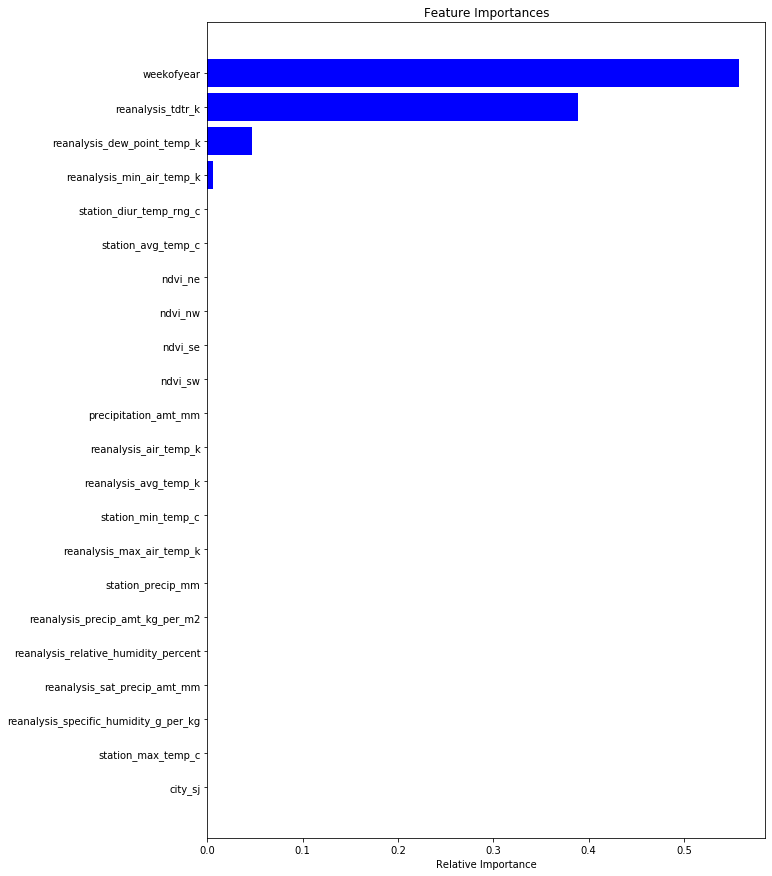

In [0]:
# plot feature importance
import matplotlib
import matplotlib.pyplot as plt

features = tr_feature_scaled.columns
importances = best_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

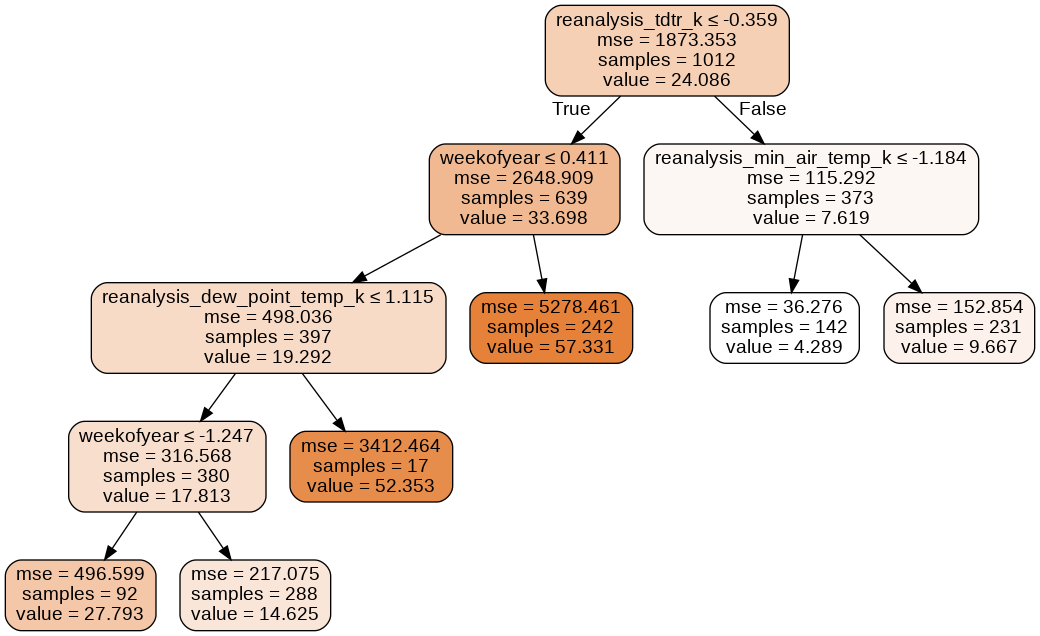

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(best_dt, out_file=dot_data,  
                feature_names=tr_feature_scaled.columns,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Predit Test Data Using Best Hyperparameter Model

In [0]:
# predict on test data
te_pred = best_dt.predict(te_feature_scaled)

In [0]:
# create submission dataframe
submission = dengue_features_test.iloc[:,0:3]
submission['predicted_total_cases'] = te_pred.astype(int)

In [0]:
submission

,city,year,weekofyear,predicted_total_cases
0,sj,2008,18,14
1,sj,2008,19,14
2,sj,2008,20,9
3,sj,2008,21,9
4,sj,2008,22,14
...,...,...,...,...
411,iq,2013,22,9
412,iq,2013,23,4
413,iq,2013,24,4
414,iq,2013,25,4


# Random Forest

## Fit a Random Forest with Default Parameters

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())

In [0]:
rf_reg = RandomForestRegressor(random_state=42)

# fit the decision tree regressor onto training data
rf_reg.fit(tr_feature_scaled, tr_label)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

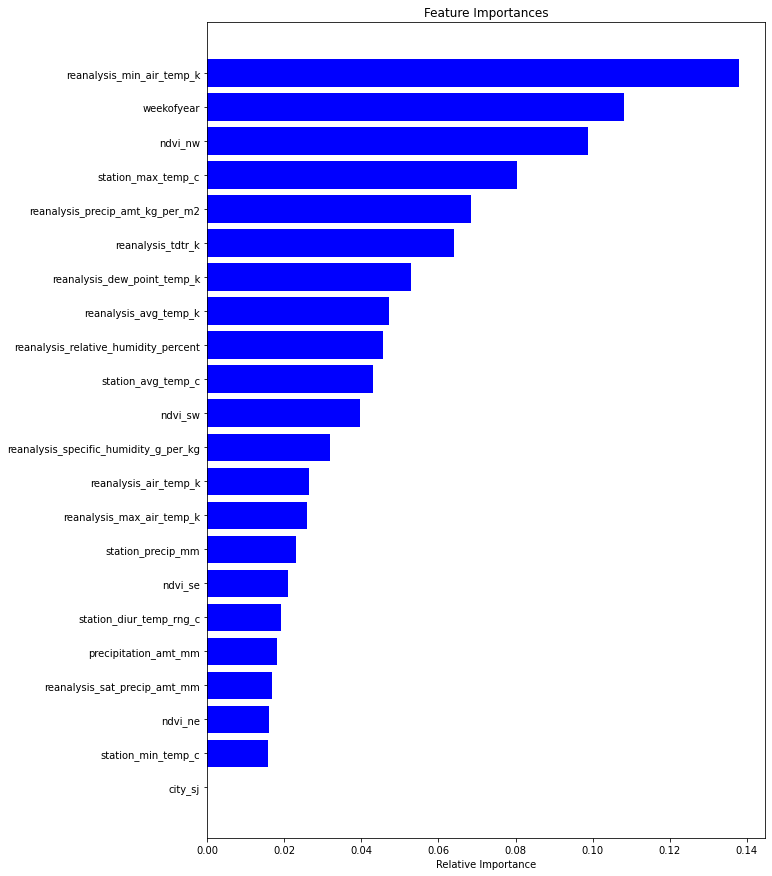

In [0]:
# plot feature importance
import matplotlib
import matplotlib.pyplot as plt

features = tr_feature_scaled.columns
importances = rf_reg.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:
# predict on val data
val_pred = rf_reg.predict(val_feature_scaled)

In [0]:
# mean absolue error of the val data
mean_absolute_error(val_label, val_pred)

18.64069124423963

In [0]:
# cross-validation
rf_cv_score = cross_val_score(rf_reg, tr_feature_scaled, tr_label, cv=20, scoring='neg_mean_absolute_error')

In [0]:
rf_mae_scores = -rf_cv_score
display_scores(rf_mae_scores)

Scores: [15.38745098 11.85490196 28.37568627 15.29019608 16.22156863 21.8727451
 21.71901961 20.87137255 17.31352941 24.71156863 16.78803922 19.8427451
 15.1756     13.6378     21.813      12.7028     16.2264     18.0828
 16.1178     13.2628    ]
Mean: 17.863391176470593


## Hyperparameters Tuning

In [0]:
# random search to fine tune hyperparameters
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform
from time import time

# set parameter range 
param_distribs = {
    'n_estimators': randint(low=2, high=1000),
    'criterion': ['mae'],
    'max_depth': randint(low=2, high=100),
    'min_samples_split': randint(low=2, high=500),
    'min_samples_leaf': randint(low=2, high=300),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False],
}

In [0]:
rf_reg = RandomForestRegressor(random_state=42)
rnd_search_rf = RandomizedSearchCV(rf_reg, param_distributions=param_distribs, n_jobs=-1,
                                   n_iter=100, cv=5, scoring='neg_mean_absolute_error', random_state=42)

start = time()
rnd_search_rf.fit(tr_feature_scaled, tr_label)
print("RandomizedSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(rnd_search_rf.cv_results_['params'])))

RandomizedSearchCV took 3498.82 seconds for 100 candidate parameter settings.


In [0]:
# display the score of each hyperparameter combination tested during the random search
cvres = rnd_search_rf.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("{:.4f}".format(mean_score), params)

In [0]:
"{:.4f}".format(-rnd_search_rf.best_score_)

'15.9989'

In [0]:
# best tuned hyperparameter values
rnd_search_rf.best_params_

{'bootstrap': True,
 'criterion': 'mae',
 'max_depth': 87,
 'max_features': None,
 'min_samples_leaf': 67,
 'min_samples_split': 171,
 'n_estimators': 558}

In [0]:
best_rf = rnd_search_rf.best_estimator_

In [0]:
# evaluate random search
val_pred = best_rf.predict(val_feature_scaled)

print("Mean Absolute Error for Decision Tree: ", "{:.4f}".format(mean_absolute_error(val_label, val_pred)))

Mean Absolute Error for Decision Tree:  17.2507


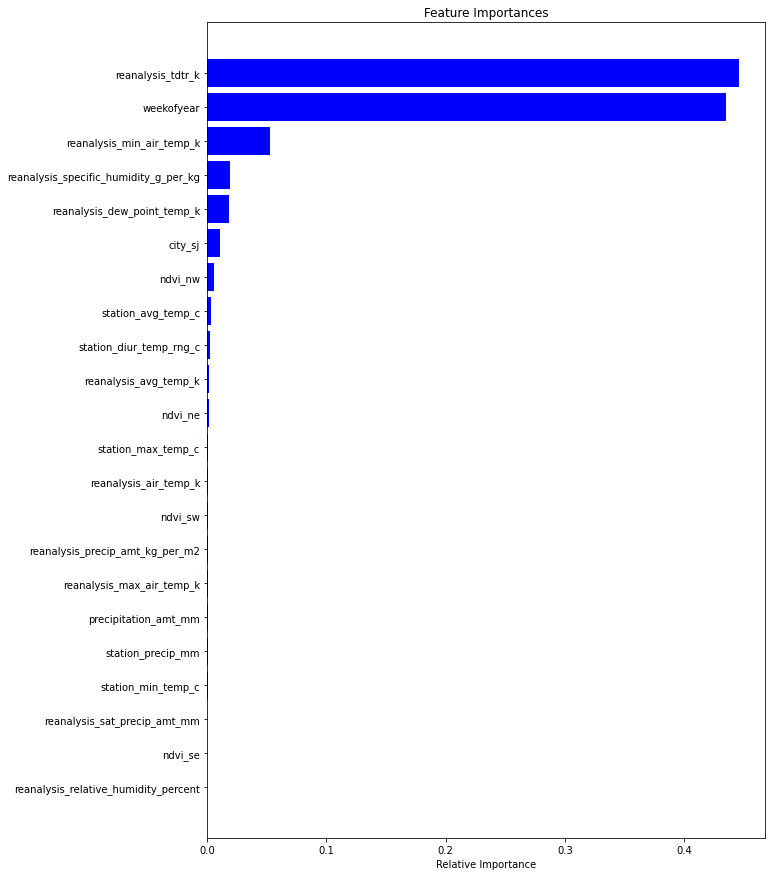

In [0]:
# plot feature importance
import matplotlib
import matplotlib.pyplot as plt

features = tr_feature_scaled.columns
importances = best_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

save all tree plots

import os
from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree

dotfile = six.StringIO()
i_tree = 0
for tree_in_forest in best_rf.estimators_:
    export_graphviz(tree_in_forest,out_file='tree.dot',
    feature_names=tr_feature_scaled.columns,
    filled=True,
    rounded=True)
    (graph,) = pydot.graph_from_dot_file('tree.dot')
    name = 'tree' + str(i_tree)
    graph.write_png(name+  '.png')
    os.system('dot -Tpng tree.dot -o tree.png')
    i_tree +=1

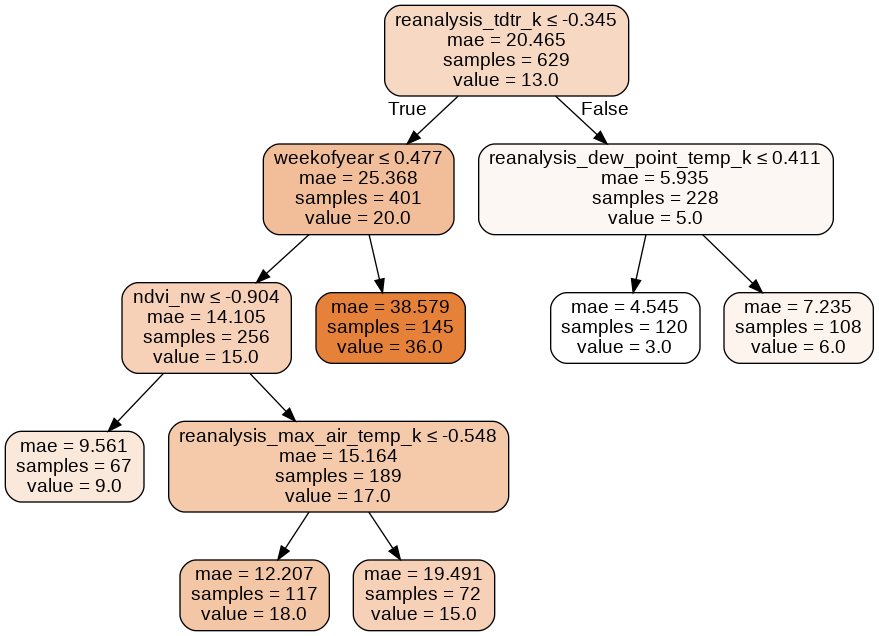

In [0]:
# visualize a tree plot within the random forest

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(best_rf.estimators_[3], out_file=dot_data,  
                feature_names=tr_feature_scaled.columns,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# SVR

## Fit a Linear SVR with Default Parameters

In [0]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())

In [0]:
np.random.seed(42)
svr_reg = SVR()

# fit the decision tree regressor onto training data
svr_reg.fit(tr_feature_scaled, tr_label)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
# predict on val data
val_pred = svr_reg.predict(val_feature_scaled)

In [0]:
# mean absolue error of the val data
mean_absolute_error(val_label, val_pred)

18.197869041042765

In [0]:
# cross-validation
svr_cv_score = cross_val_score(svr_reg, tr_feature_scaled, tr_label, cv=20, scoring='neg_mean_absolute_error')

In [0]:
svr_mae_scores = -svr_cv_score
display_scores(svr_mae_scores)

Scores: [16.62853497  8.05126107 24.069057   14.34807067 16.69296052 27.65594719
 15.77963322 22.59389814 12.75971032 29.49639874 12.88086806 18.94924736
 12.90314229 11.46292117 21.26442201 11.39521346 12.68277372 22.23023434
 15.25421945  9.82755637]
Mean: 16.8463035037133


## Hyperparameters Tuning

In [0]:
# random search to fine tune hyperparameters
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform
from time import time

# set parameter range 
param_distribs = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': uniform(loc=0, scale=3),
    'tol': uniform(loc=0, scale=1),
    'C': uniform(loc=0, scale=5),
    'epsilon': uniform(loc=0, scale=1),
}

In [0]:
np.random.seed(42)
svr_reg = SVR()
rnd_search_svr = RandomizedSearchCV(svr_reg, param_distributions=param_distribs, n_jobs=-1,
                                   n_iter=100, cv=5, scoring='neg_mean_absolute_error', random_state=42)

start = time()
rnd_search_svr.fit(tr_feature_scaled, tr_label)
print("RandomizedSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(rnd_search_svr.cv_results_['params'])))

RandomizedSearchCV took 1595.33 seconds for 100 candidate parameter settings.


In [0]:
# display the score of each hyperparameter combination tested during the random search
cvres = rnd_search_svr.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("{:.4f}".format(mean_score), params)

In [0]:
"{:.4f}".format(-rnd_search_rf.best_score_)

'15.9989'

In [0]:
# best tuned hyperparameter values
rnd_search_svr.best_params_

{'C': 4.221065703631557,
 'epsilon': 0.9300168348108319,
 'gamma': 0.2112483925486317,
 'kernel': 'rbf',
 'tol': 0.6150072266991697}

In [0]:
best_svr = rnd_search_svr.best_estimator_

In [0]:
# evaluate random search
val_pred = best_svr.predict(val_feature_scaled)

print("Mean Absolute Error for Decision Tree: ", "{:.4f}".format(mean_absolute_error(val_label, val_pred)))

Mean Absolute Error for Decision Tree:  17.5506


# SGD Regressor

## Fit a SGD Regressor with Default Parameters

In [0]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())

In [0]:
np.random.seed(42)
sgd_reg = linear_model.SGDRegressor()

# fit the decision tree regressor onto training data
sgd_reg.fit(tr_feature_scaled, tr_label)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [0]:
# predict on val data
val_pred = sgd_reg.predict(val_feature_scaled)

In [0]:
# mean absolue error of the val data
mean_absolute_error(val_label, val_pred)

21.055120991799093

In [0]:
# cross-validation
sgd_cv_score = cross_val_score(sgd_reg, tr_feature_scaled, tr_label, cv=20, scoring='neg_mean_absolute_error')

In [0]:
sgd_mae_scores = -sgd_cv_score
display_scores(sgd_mae_scores)

Scores: [19.12935602 15.00153441 28.1012052  18.80579373 19.83831209 28.00639258
 21.43718055 24.02224182 18.18736551 29.53036646 15.18957959 23.19307303
 19.02758944 19.25676779 24.6883582  15.38100577 18.08914501 22.91424365
 19.03757619 17.40094424]
Mean: 20.811901564063568


## Hyperparameters Tuning

In [0]:
# random search to fine tune hyperparameters
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform
from time import time

# set parameter range 
param_distribs = {
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': uniform(loc=0, scale=1),
    'tol': uniform(loc=0, scale=1),
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'early_stopping': [True, False],
}

In [0]:
np.random.seed(42)
sgd_reg = linear_model.SGDRegressor()
rnd_search_sdg = RandomizedSearchCV(sgd_reg, param_distributions=param_distribs, n_jobs=-1,
                                   n_iter=1000, cv=5, scoring='neg_mean_absolute_error', random_state=42)

start = time()
rnd_search_sdg.fit(tr_feature_scaled, tr_label)
print("RandomizedSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(rnd_search_sdg.cv_results_['params'])))

RandomizedSearchCV took 72.20 seconds for 1000 candidate parameter settings.


In [0]:
# display the score of each hyperparameter combination tested during the random search
cvres = rnd_search_sdg.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("{:.4f}".format(mean_score), params)

In [0]:
"{:.4f}".format(-rnd_search_sdg.best_score_)

'17.2646'

In [0]:
# best tuned hyperparameter values
rnd_search_sdg.best_params_

{'alpha': 0.007964404745451126,
 'early_stopping': False,
 'learning_rate': 'adaptive',
 'loss': 'epsilon_insensitive',
 'penalty': 'l1',
 'tol': 0.5355538148796726}

In [0]:
best_sdg = rnd_search_sdg.best_estimator_

In [0]:
# evaluate random search
val_pred = best_sdg.predict(val_feature_scaled)

print("Mean Absolute Error for Decision Tree: ", "{:.4f}".format(mean_absolute_error(val_label, val_pred)))

Mean Absolute Error for Decision Tree:  18.4439
